In [76]:
import pandas as pd          
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")

In [77]:
#Loading the datasets
train=pd.read_csv("train_csv.csv") 
test=pd.read_csv("test_csv.csv")

In [78]:
train.head()

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70


In [79]:
train.tail()

,id,time,feature
75,75,2019-03-19 00:12:30,469.72
76,76,2019-03-19 00:12:40,406.79
77,77,2019-03-19 00:12:50,128.91
78,78,2019-03-19 00:13:00,85.28
79,79,2019-03-19 00:13:10,121.12


In [80]:
train.columns, test.columns #Column names

(Index(['id', 'time', 'feature'], dtype='object'),
 Index(['id', 'time'], dtype='object'))

In [81]:
train.dtypes, test.dtypes #Checking datatypes of datasets

(id           int64
 time        object
 feature    float64
 dtype: object,
 id       int64
 time    object
 dtype: object)

In [82]:
train.shape, test.shape #Checking shape of the dataset

((80, 3), (40, 2))

We will extract the time and date from the Datetime. We have seen earlier that the data type of Datetime is object. So first of all we have to change the data type to datetime format otherwise we can not extract features from it.

In [83]:
#Changing the time to data-time format as time is of object datatype
train['time'] = pd.to_datetime(train.time,format='%Y-%m-%d %S:%H:%M') 
test['time'] = pd.to_datetime(test.time,format='%Y-%m-%d %S:%H:%M')

In [84]:
train['time'].dtypes, test['time'].dtypes #Changed to datetime format

(dtype('<M8[ns]'), dtype('<M8[ns]'))

In [85]:
for i in (train, test):
    i['year']=i.time.dt.year 
    i['month']=i.time.dt.month 
    i['day']=i.time.dt.day
    i['Hour']=i.time.dt.hour 

In [86]:
i['year'].head(), i['month'].head(), i['day'].head(), i['Hour'].head()

(0    2019
 1    2019
 2    2019
 3    2019
 4    2019
 Name: year, dtype: int64,
 0    3
 1    3
 2    3
 3    3
 4    3
 Name: month, dtype: int64,
 0    19
 1    19
 2    19
 3    19
 4    19
 Name: day, dtype: int64,
 0    13
 1    13
 2    13
 3    13
 4    14
 Name: Hour, dtype: int64)

In [87]:
train.dtypes

id                  int64
time       datetime64[ns]
feature           float64
year                int64
month               int64
day                 int64
Hour                int64
dtype: object

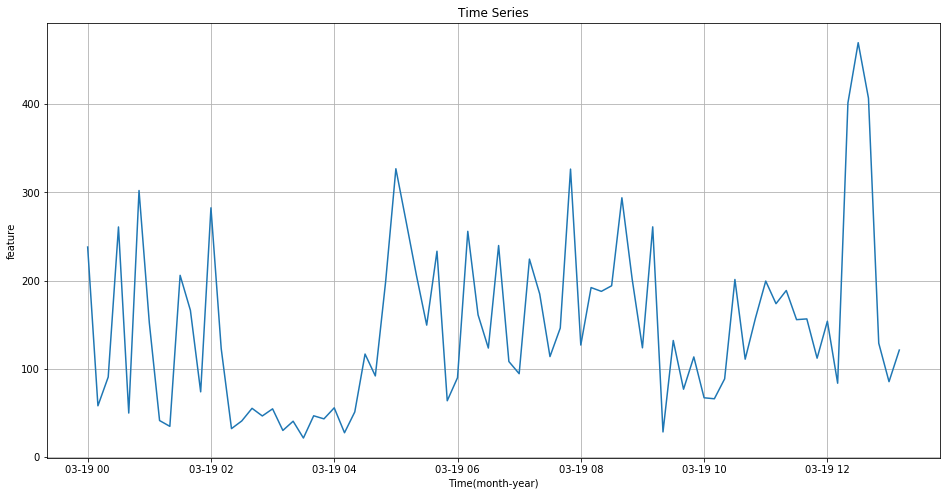

In [88]:
train.index = train['time'] # indexing the Datetime to get the time period on the x-axis. 
df=train.drop('id',1)           # drop ID variable to get only the Datetime on x-axis. 
ts = df['feature'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='feature vs time') 
plt.title('Time Series') 
plt.xlabel("Time(month-year)") 
plt.ylabel("feature")
plt.grid(True)


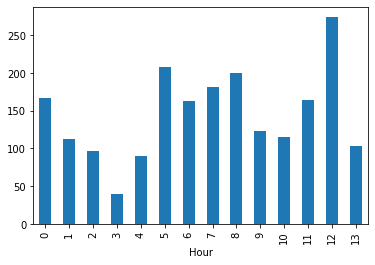

In [89]:
train.groupby('Hour')['feature'].mean().plot.bar() #Bar chart of feature in each hour

In [93]:
#Splitting the dataset into train and test in the ratio 70:30
train = train[0:int(len(train)*0.7)] 
test = train[int(len(train)*0.7):]

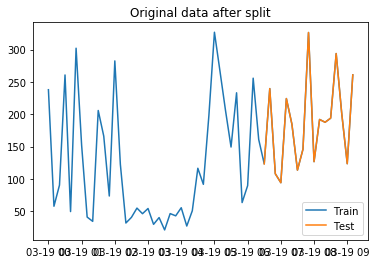

<Figure size 2160x1440 with 0 Axes>

In [98]:
plt.plot(train.index, train.feature, label = 'Train')
plt.plot(test.index, test.feature,  label = 'Test')
plt.legend(loc = 'best')
plt.title('Original data after split')
plt.figure(figsize=(30,20))
plt.show()

##### Here the blue part represents the TRAIN data and the orange part represents the TEST data.

#  MOVING AVERAGE METHOD

##### Here the predictions are made on the basis of the average of last few points instead of taking all the previously known values.

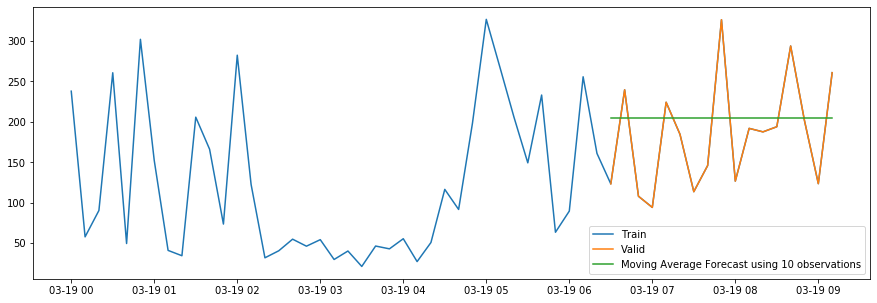

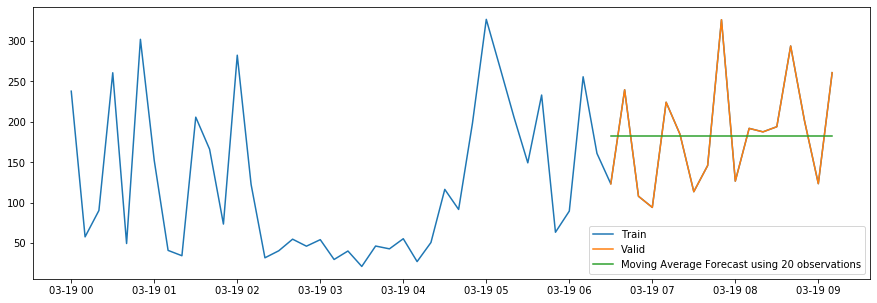

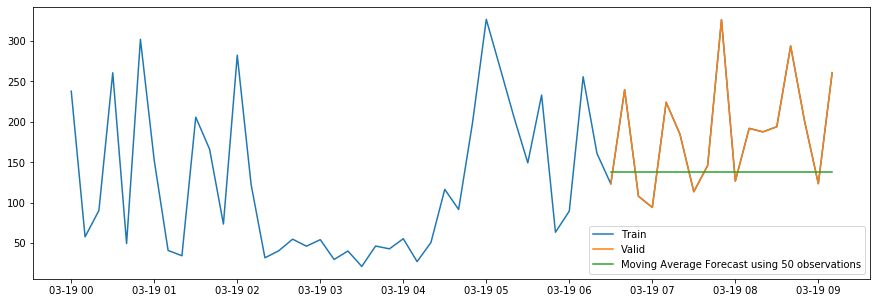

In [101]:
y_hat_avg = test.copy() 
y_hat_avg['moving_avg_forecast'] = train['feature'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(train['feature'], label='Train') 
plt.plot(test['feature'], label='test') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show()

y_hat_avg = test.copy() 
y_hat_avg['moving_avg_forecast'] = train['feature'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(train['feature'], label='Train') 
plt.plot(test['feature'], label='test') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show()

y_hat_avg = test.copy() 
y_hat_avg['moving_avg_forecast'] = train['feature'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(train['feature'], label='Train') 
plt.plot(test['feature'], label='test') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()


### RMSE SCORE 

In [106]:
import math
from sklearn.metrics import  mean_squared_error
rms = math.sqrt(mean_squared_error(test.feature, y_hat_avg.moving_avg_forecast)) 
print(rms)

80.67928431756997


# Simple Exponential Smoothing

##### In this technique, we assign larger weights to more recent observations than to observations from the distant past. The weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.

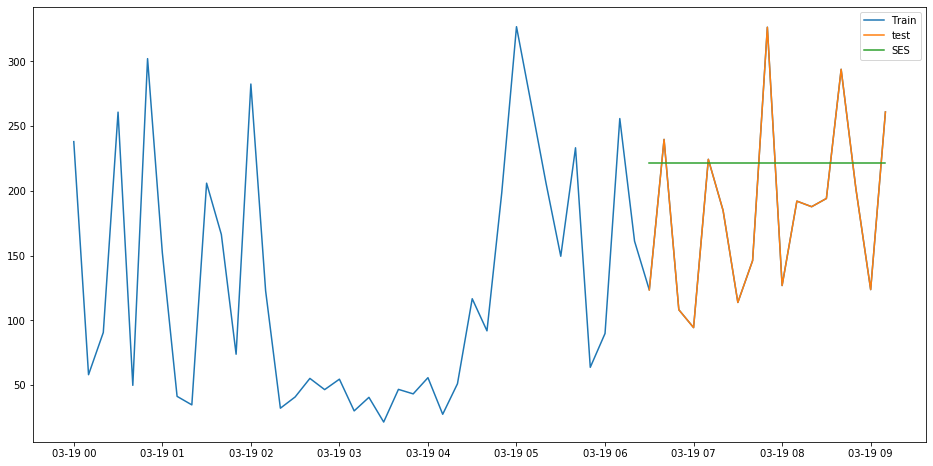

In [110]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
y_hat_avg = test.copy() 
fit2 = SimpleExpSmoothing(np.asarray(train['feature'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test)) 
plt.figure(figsize=(16,8)) 
plt.plot(train['feature'], label='Train') 
plt.plot(test['feature'], label='test') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()

### RMSE SCORE 

In [112]:
rms = math.sqrt(mean_squared_error(test.feature, y_hat_avg.SES)) 
print(rms)

75.6982863577949


#### seasonal decomposition 

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


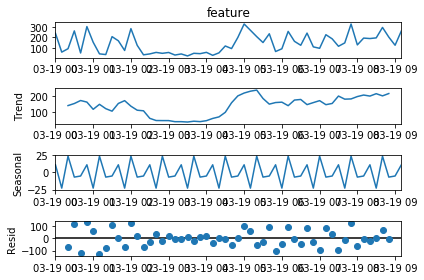

In [118]:
decomposition = sm.tsa.seasonal_decompose(train.feature, model="additive", freq=5)
decomposition.plot()
plt.show()

#  Holt’s Linear Trend Model 

##### It is an extension of simple exponential smoothing to allow forecasting of data with a trend.

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


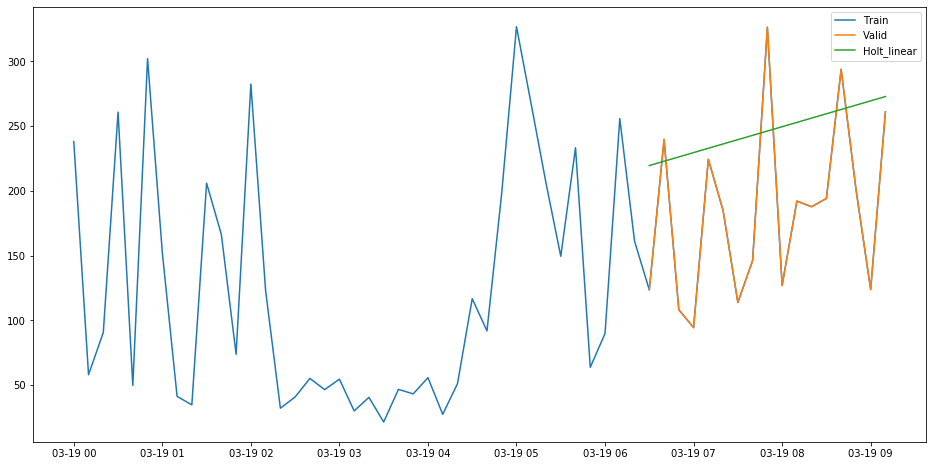

In [119]:
y_hat_avg = test.copy() 
fit1 = Holt(np.asarray(train['feature'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test)) 
plt.figure(figsize=(16,8)) 
plt.plot(train['feature'], label='Train') 
plt.plot(test['feature'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

### RMSE SCORE

In [121]:
rms = math.sqrt(mean_squared_error(test.feature, y_hat_avg.Holt_linear)) 
print(rms)

87.54812200866614


# Holt winter's Model

##### This method that takes into account both trend and seasonality to forecast future prices.

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


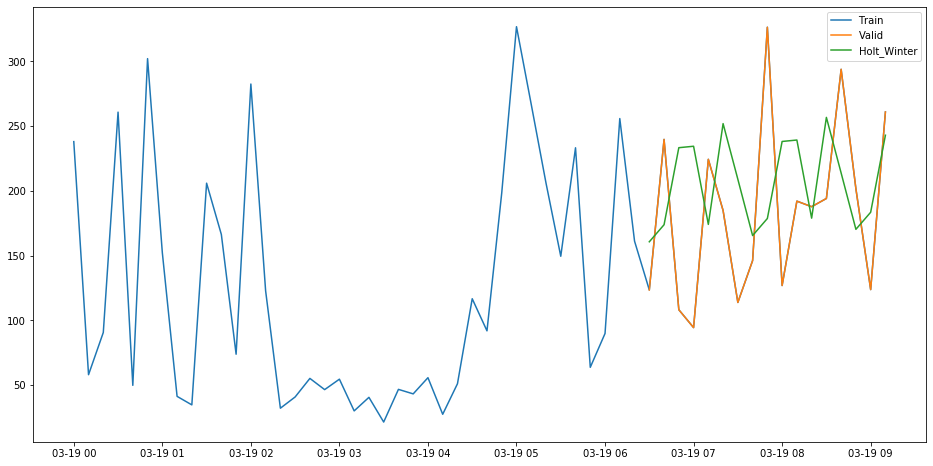

In [122]:
y_hat_avg = test.copy() 
fit1 = ExponentialSmoothing(np.asarray(train['feature']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit() 
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test)) 
plt.figure(figsize=(16,8)) 
plt.plot( train['feature'], label='Train') 
plt.plot(test['feature'], label='Valid') 
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter') 
plt.legend(loc='best') 
plt.show()

### RMSE SCORE

In [124]:
rms = math.sqrt(mean_squared_error(test.feature, y_hat_avg.Holt_Winter))
print(rms)

80.15451836259865


# SARIMAX MODEL

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  % freq, ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  % freq, ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


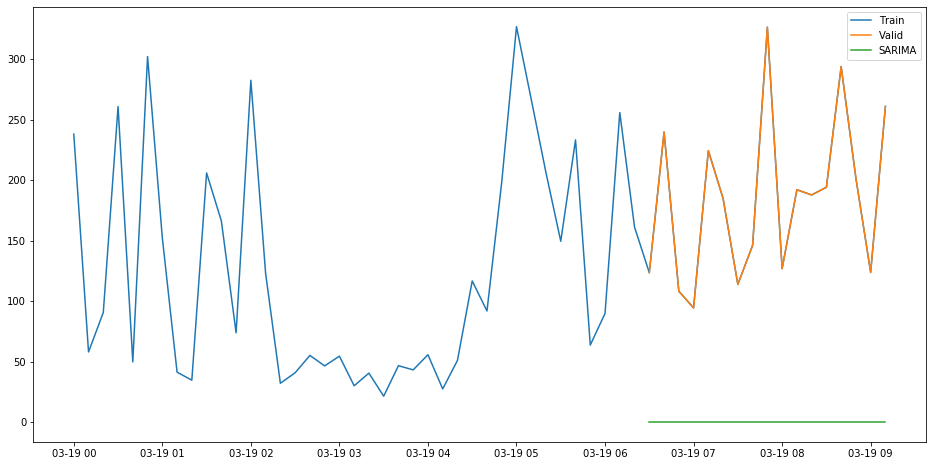

In [139]:
import statsmodels.api as sm
y_hat_avg = test.copy() 
fit1 = sm.tsa.statespace.SARIMAX(train.feature, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit() 
y_hat_avg['SARIMA'] = fit1.predict(start=0, end=56, dynamic=True)
plt.figure(figsize=(16,8)) 
plt.plot( train['feature'], label='Train') 
plt.plot(test['feature'], label='Valid') 
plt.plot(y_hat_avg['SARIMA'], label='SARIMA') 
plt.legend(loc='best') 
plt.show()


### RMSE SCORE

In [140]:
rms = math.sqrt(mean_squared_error(test.feature, y_hat_avg.SARIMA)) 
print(rms)

196.23195332535002


## Implementation of ARIMA MODEL

#### To make our time series stationary we use dicky fuller test

In [153]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

arima_train =  train['feature']
arima_test =  test['feature']

In [154]:
dftest = adfuller(arima_train)
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -2.019
DF test p-value is 0.2782


Text(0, 0.5, 'Feature')

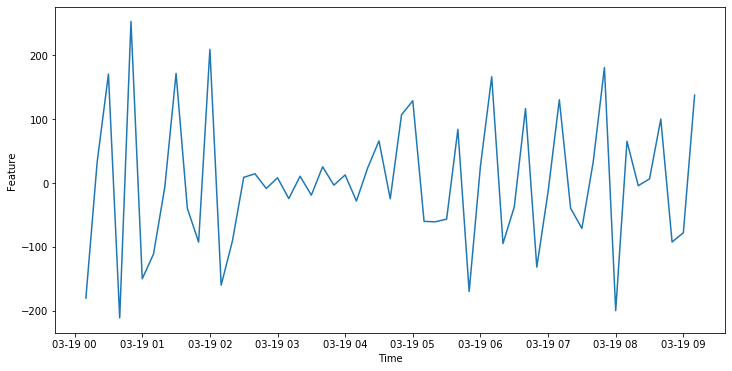

In [155]:
plt.figure(figsize=(12, 6))
plt.plot(feature_ts_train.diff(periods=1))
plt.xlabel('Time')
plt.ylabel('Feature')

In [156]:
dftest = adfuller(arima_train)
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -2.019
DF test p-value is 0.2782


In [157]:
arima_train_diff = arima_train.diff(periods=1)
arima_train_diff.dropna(inplace=True)

arima_test_diff = arima_test.diff(periods=1)
arima_test_diff.dropna(inplace=True)

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  % freq, ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  % freq, ValueWarning)


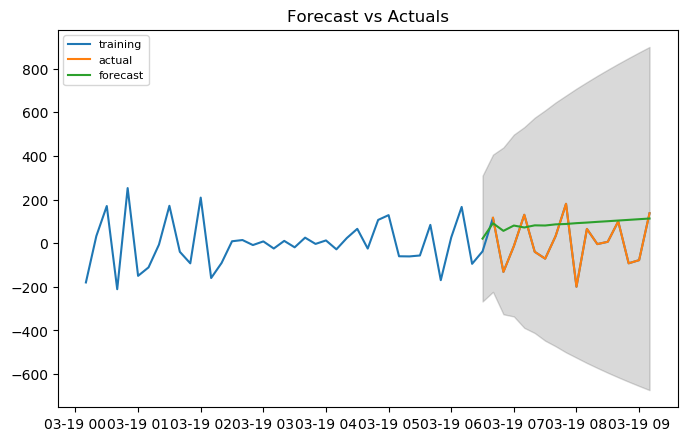

In [159]:
#Building ARIMA Model 
model = ARIMA(arima_train_diff, order=(1, 1, 0)) #P=1,Q=1,D=0 
fitted = model.fit()  

# Forecasting
fc, se, conf = fitted.forecast(17, alpha=0.05)  #INDEX SIZE =17


fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plotting of ARIMA trend
plt.figure(figsize=(8,5), dpi=100)
plt.plot(arima_train_diff, label='training')
plt.plot(arima_test_diff, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [169]:
fitted.aic

698.6304123536379

In [168]:
forecast = fitted.forecast(steps=40)[0]
predice_to_pred = pd.read_csv('test_csv.csv')
predice_to_pred['forecast'] = forecast
predice_to_pred

,id,time,forecast
0,80,2019-03-19 00:13:20,20.873951
1,81,2019-03-19 00:13:30,91.168036
2,82,2019-03-19 00:13:40,56.370118
3,83,2019-03-19 00:13:50,80.753002
4,84,2019-03-19 00:14:00,71.809208
5,85,2019-03-19 00:14:10,81.632775
6,86,2019-03-19 00:14:20,80.887817
7,87,2019-03-19 00:14:30,86.094346
8,88,2019-03-19 00:14:40,87.949395
9,89,2019-03-19 00:14:50,91.691774


### CONCLUSION

We got the least RMSE SCORE in Simple Exponential Smoothing Method